In [10]:
#1
import pandas as pd

df = pd.read_csv('cancer.csv')

print(df)

print(f"Shape: {df.shape}")


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [12]:
#2
print("Column Names:", df.columns)

print(df.dtypes)


Column Names: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concav

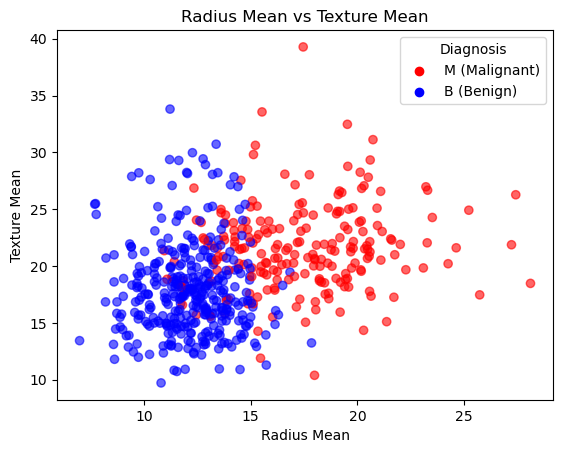

In [14]:
#3
import matplotlib.pyplot as plt

colors = {'M': 'red', 'B': 'blue'}

plt.scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'].map(colors), alpha=0.6)

plt.xlabel('Radius Mean')

plt.ylabel('Texture Mean')

plt.title('Radius Mean vs Texture Mean')

for label, color in colors.items(): plt.scatter([], [], c=color, label=f'{label} ({"Malignant" if label == "M" else "Benign"})')

plt.legend(title="Diagnosis", loc='upper right')

plt.show()

In [16]:
#4
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])  # 'M' -> 1, 'B' -> 0

print(df['diagnosis'].head()) 

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [18]:
#5
X = df.drop('diagnosis', axis=1)

Y = df['diagnosis']

In [20]:
#6
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(f"Training data shape: {X_train.shape}, {Y_train.shape}")

print(f"Testing data shape: {X_test.shape}, {Y_test.shape}")

Training data shape: (398, 32), (398,)
Testing data shape: (171, 32), (171,)


In [22]:
#7
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


In [28]:
#8
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[101   2]
 [ 66   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.75       103
           1       0.50      0.03      0.06        68

    accuracy                           0.60       171
   macro avg       0.55      0.50      0.40       171
weighted avg       0.56      0.60      0.47       171

